<a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.12.Colab_Rainfall_AirTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ERA5 Climate Data - Rainfall and Air Temperature 
This notebook uses the ECMWF ERA5 climate reanalysis product from Google (https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_MONTHLY). This product combines model data with observations from across the world into a globally complete and consistent dataset. The product produces data that goes several decades back in time, providing an accurate description of the climate of the past. The data presented here is a subset of the full ERA5-Land dataset post-processed by ECMWF. Monthly-mean averages have been pre-calculated to facilitate many applications requiring easy and fast access to the data, when sub-monthly fields are not required. The spatial resolution is 11.132 km. The dataset starts in 1981.

## Instructions for Execution
It is suggested that users first execute the notebook "as is" to successfully complete the Google authorizations and view sample results. Then, users should look for "MODIFY HERE" labels at the top of code blocks to identify code that can be modified. These include:<br>
<br>#1 - Select spatial region
<br>#2 - Select the time range
<br>#3 - Select the measurements
<br>#4 - Select CSV output parameters
<br><br>
Once the full notebook has been run, users can run individual code blocks using "Shift-Return" or run segments of the code using the Runtime menu. Users do not have to go thru the Google authorization steps for additional execution cycles. 

In [ ]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

In [ ]:
from odc_colab import populate_db
populate_db()

## Load the Data Cube Configuration and Import Utilities

In [ ]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

# Load Data Cube Configuration
from odc_gee.earthengine import Datacube
dc = Datacube()

# Import Utilities
from utils.data_cube_utilities.dc_display_map import display_map
import folium
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Define the Analysis Inputs: Region, Time Period, Variables

In [ ]:
#1 MODIFY HERE
# Define the analysis region (Lat-Lon box)

# Kingston, Jamaica
lat = (17.9468, 18.0943) 
lon = (-76.8590, -76.7347)  

In [ ]:
#2 MODIFY HERE
# Define the time window

time_start = '2018-01-01'
time_end = '2021-12-31'

In [ ]:
f = folium.Figure(width=800, height=800)
m = display_map(lat,lon)
f.add_child(m)

## Load the Data

In [ ]:
#3 MODIFY HERE

# Load the dataset
# Select the desired measurements. See the website below for a list of possible measurement names.
# https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_MONTHLY#bands

ds = dc.load(asset='ECMWF/ERA5_LAND/MONTHLY', output_crs='EPSG:4326', resolution=(-0.1, 0.1),
             lat=lat, lon=lon, time=(time_start, time_end), measurements=['temperature_2m','total_precipitation'])

In [ ]:
# Convert temperature from Kelvin to Celsius 
ds['temperature_2m'] = ds['temperature_2m'].where(ds['temperature_2m'] < 9999)-273.15

# Convert precipitation from Meters (m) to Millimeters (mm)
ds['total_precipitation'] = ds['total_precipitation'].where(ds['total_precipitation'] < 9999)*1000

In [ ]:
# Show sample dataset array
# The latitude and longitude dimensions show the number of data tiles in the region
ds

<xarray.Dataset>
Dimensions:              (time: 47, latitude: 2, longitude: 2)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-01 ... 2021-11-01
  * latitude             (latitude) float64 18.05 17.95
  * longitude            (longitude) float64 -76.85 -76.75
    spatial_ref          int32 4326
Data variables:
    temperature_2m       (time, latitude, longitude) float64 nan 22.59 ... nan
    total_precipitation  (time, latitude, longitude) float64 nan 4.251 ... nan
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## Plot Monthly Air Temperature at 2-meters height

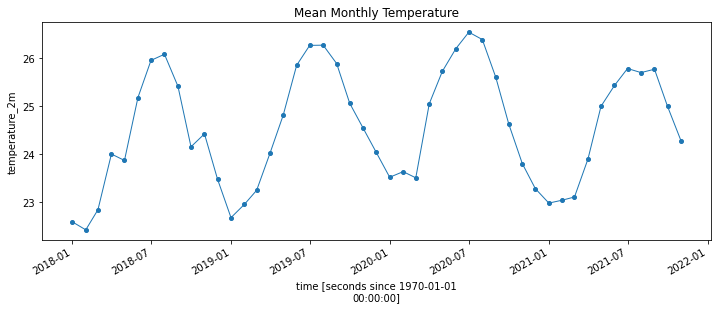

In [ ]:
# Plot mean monthly temperature for the area defined by the Lat-Lon region above
img1 = ds['temperature_2m'].mean(dim=['longitude','latitude']).plot(figsize=(12,4),marker='o',markersize=4,linewidth=1)
img1[0].axes.set_title("Mean Monthly Temperature");

In [ ]:
# Calculate Statistics (Min, Max, Mean)
min_temp = ds['temperature_2m'].min(['latitude', 'longitude', 'time']).values
max_temp = ds['temperature_2m'].max(['latitude', 'longitude', 'time']).values
mean_temp = ds['temperature_2m'].mean(['latitude', 'longitude', 'time']).values

In [ ]:
print(f'Min Temperature = {min_temp.round(2)}')
print(f'Max Temperature = {max_temp.round(2)}')
print(f'Mean Temperature = {mean_temp.round(2)}')

Min Temperature = 22.42
Max Temperature = 26.54
Mean Temperature = 24.55


## Plot Monthly Precipitation

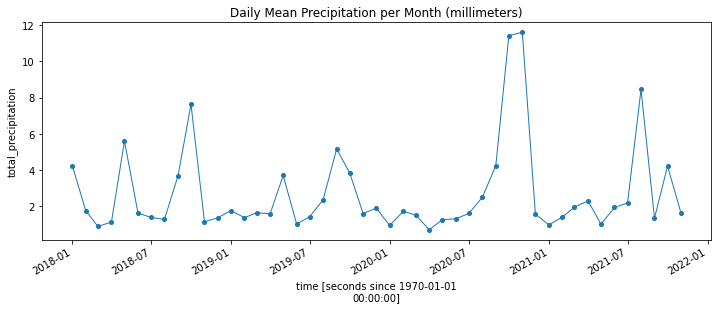

In [ ]:
# Plot mean monthly accumulated precipitation for an area defined by the Lat-Lon region above
img2 = ds['total_precipitation'].mean(dim=['longitude','latitude']).plot(figsize=(12,4),marker='o',markersize=4,linewidth=1)
img2[0].axes.set_title("Daily Mean Precipitation per Month (millimeters)");

In [ ]:
# Calculate Statistics (Min, Max, Mean)
min_rainfall = ds['total_precipitation'].min(['latitude', 'longitude', 'time']).values
max_rainfall = ds['total_precipitation'].max(['latitude', 'longitude', 'time']).values
mean_rainfall = ds['total_precipitation'].mean(['latitude', 'longitude', 'time']).values

In [ ]:
print(f'Min Rainfall = {min_rainfall.round(2)}\nMax Rainfall = {max_rainfall.round(2)}')
print(f'Mean Rainfall = {mean_rainfall.round(2)}')
print(f'Annual Rainfall (mm) = {(mean_rainfall*365).round(2)}')

Min Rainfall = 0.7
Max Rainfall = 11.6
Mean Rainfall = 2.7
Annual Rainfall (mm) = 985.74


## CSV Output

In [ ]:
#4 MODIFY HERE

# Output monthly mean temperature
# filename1 = "output/monthly_temperature_example.csv"
# ds['temperature_2m'].mean(dim=['longitude', 'latitude']).to_dataframe().to_csv(filename1)

# Output monthly rainfall accumulation
# filename2 = "output/monthly_rainfall_example.csv"
# ds['total_precipitation'].mean(dim=['longitude', 'latitude']).to_dataframe().to_csv(filename2)